## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch

## Loading Dataset

In [2]:
df = pd.read_csv('Sleep_EEG.csv')

In [3]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


## Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [5]:
df.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.00000
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05,0.42838
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05,0.49491
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01,0.00000
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03,0.00000
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04,0.00000
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05,1.00000
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06,1.00000


In [6]:
df.corr()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
attention,1.000000,0.012465,-0.142241,-0.053082,-0.051414,0.047367,0.006725,0.166178,0.059002,0.032169,0.049283
meditation,0.012465,1.000000,-0.075071,-0.081029,0.159976,0.015013,0.009094,0.027394,-0.097699,0.166853,-0.057642
delta,-0.142241,-0.075071,1.000000,0.380921,0.363079,0.257987,0.349557,0.225820,0.253741,0.287873,-0.229921
theta,-0.053082,-0.081029,0.380921,1.000000,0.456296,0.656068,0.344237,0.663608,0.285673,0.594448,-0.205588
lowAlpha,-0.051414,0.159976,0.363079,0.456296,1.000000,0.256059,0.693183,0.437718,0.294094,0.444335,-0.174786
highAlpha,0.047367,0.015013,0.257987,0.656068,0.256059,1.000000,0.271657,0.632582,0.281427,0.469033,-0.190926
lowBeta,0.006725,0.009094,0.349557,0.344237,0.693183,0.271657,1.000000,0.199992,0.403545,0.182727,-0.063340
highBeta,0.166178,0.027394,0.225820,0.663608,0.437718,0.632582,0.199992,1.000000,0.301577,0.650842,-0.213560
lowGamma,0.059002,-0.097699,0.253741,0.285673,0.294094,0.281427,0.403545,0.301577,1.000000,0.027007,-0.049076
highGamma,0.032169,0.166853,0.287873,0.594448,0.444335,0.469033,0.182727,0.650842,0.027007,1.000000,-0.103819


In [7]:
df['classification'].value_counts()

0    2135
1    1600
Name: classification, dtype: int64

## Feature Extraction

In [8]:
signals =df.drop(['classification'],axis=1)
labels = df['classification'].values

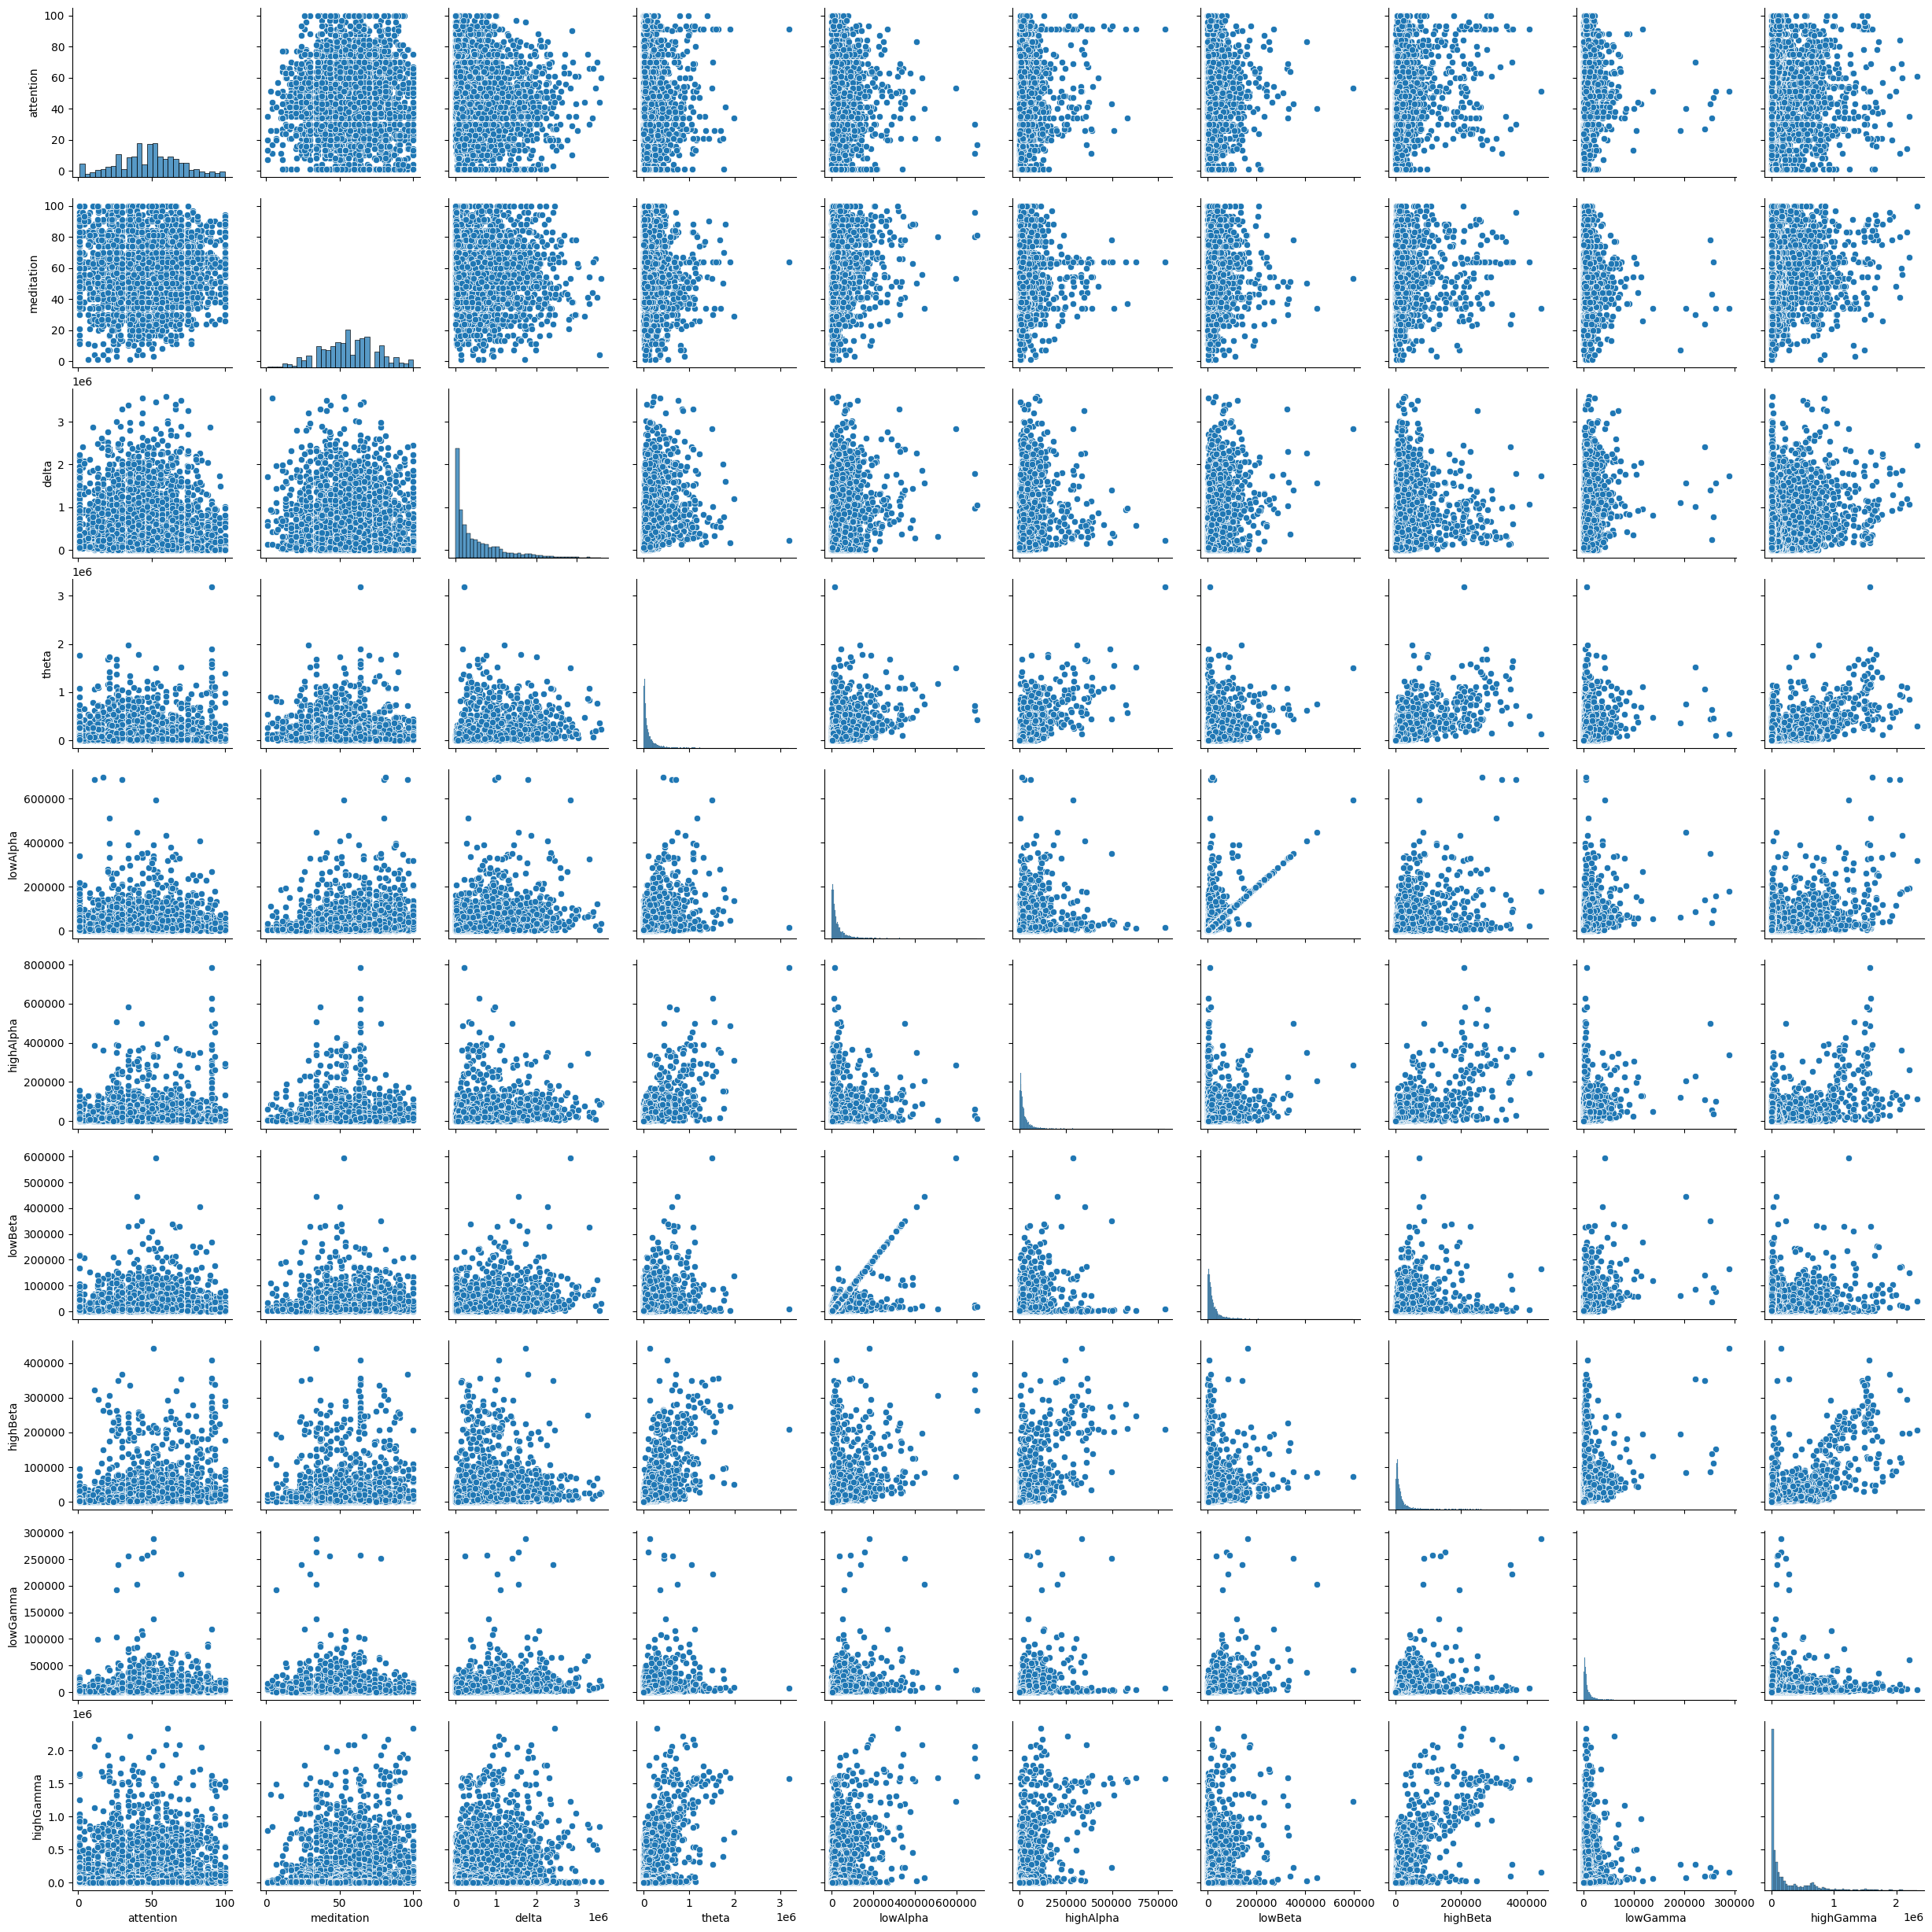

In [9]:
sns.pairplot(signals)
plt.show()

## Spliting Data into Training And Testing 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=42)

## Applying Classification Algorithms

### 1.Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.784471218206158


In [17]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   macro avg       0.78      0.77      0.78       747
weighted avg       0.78      0.78      0.78       747



Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix (Random Forest)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

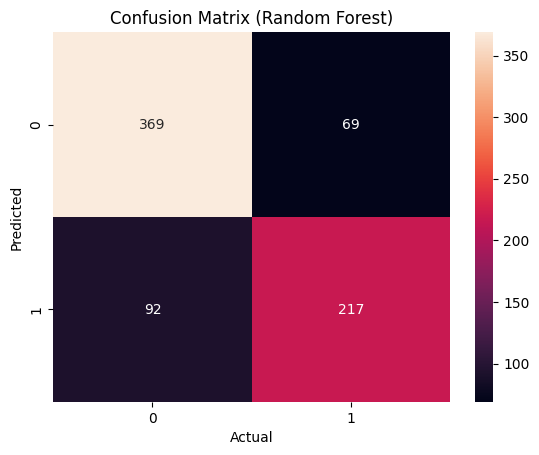

In [18]:
print('Confusion Matrix:')

rfc=confusion_matrix(y_test, y_pred)
sns.heatmap(rfc, annot=True, fmt='g').set(title='Confusion Matrix (Random Forest)', xlabel='Actual', ylabel='Predicted')

### 2.SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  
svm.fit(X_train, y_train)

SVC(random_state=42)

In [21]:
y_pred = svm.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7161981258366801
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       438
           1       0.66      0.65      0.66       309

    accuracy                           0.72       747
   macro avg       0.71      0.71      0.71       747
weighted avg       0.72      0.72      0.72       747



Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix (Random Forest)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

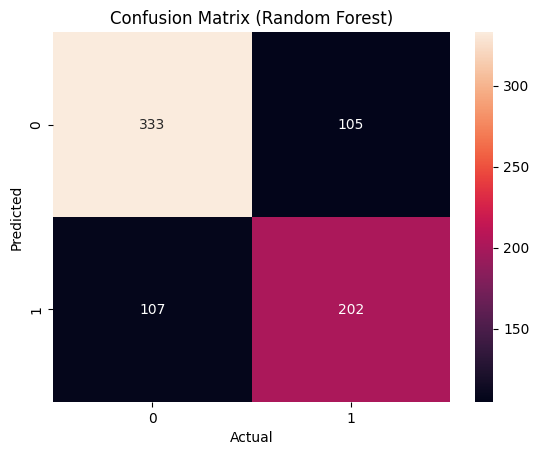

In [24]:
print('Confusion Matrix:')

rfc=confusion_matrix(y_test, y_pred)
sns.heatmap(rfc, annot=True, fmt='g').set(title='Confusion Matrix (Random Forest)', xlabel='Actual', ylabel='Predicted')

### 3 Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Initialize logistic regression
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7095046854082999
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       438
           1       0.65      0.65      0.65       309

    accuracy                           0.71       747
   macro avg       0.70      0.70      0.70       747
weighted avg       0.71      0.71      0.71       747



Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix (Random Forest)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

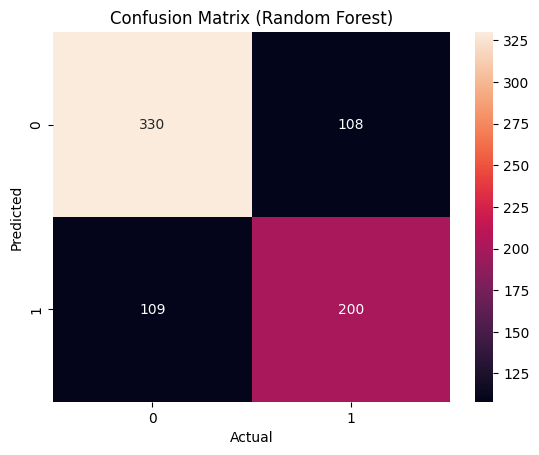

In [29]:
print('Confusion Matrix:')

rfc=confusion_matrix(y_test, y_pred)
sns.heatmap(rfc, annot=True, fmt='g').set(title='Confusion Matrix (Random Forest)', xlabel='Actual', ylabel='Predicted')

In [30]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('clf', clf), ('svm', svm), ('logreg', logreg)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7443105756358769

In [31]:
index = ['Random Forest','svm','Logistic Regression']
data = [[clf.score(X_train,y_train) , clf.score(X_test,y_test)],[svm.score(X_train,y_train) , svm.score(X_test,y_test)], [logreg.score(X_train,y_train) , logreg.score(X_test,y_test)]]
accuracy_table = pd.DataFrame(data, columns = ['Train Accuracy' , 'Test Accuracy'], index = index)
accuracy_table

,Train Accuracy,Test Accuracy
Random Forest,1.000000,0.784471
svm,0.687751,0.716198
Logistic Regression,0.681392,0.709505


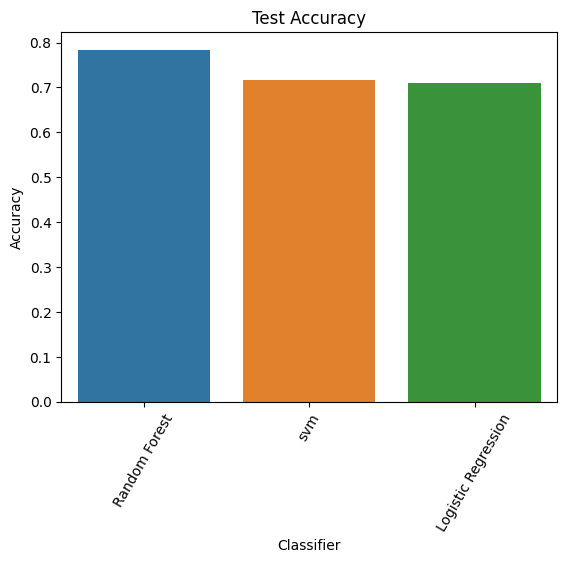

In [32]:
axis = sns.barplot(x = index, y = accuracy_table['Test Accuracy'])
plt.title('Test Accuracy')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for item in axis.get_xticklabels():
    item.set_rotation(60)

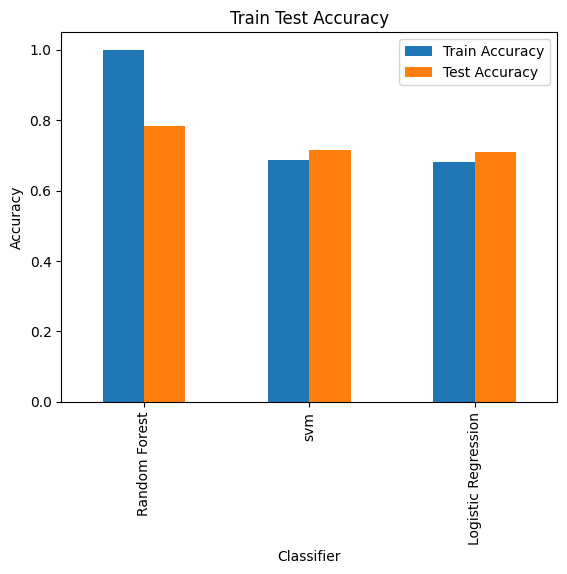

In [33]:
accuracy_table.plot.bar() 
plt.title('Train Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()